In [ ]:
# early_stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust as needed
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping]
)

In [ ]:
################################################################################################################################

In [ ]:
## uploading and loading the files and datasets

In [ ]:
from google.colab import files
upload = files.upload()

Saving utkface_train.zip to utkface_train.zip


In [ ]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = "utkface_train.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("utkface_dataset")

In [ ]:
from google.colab import files
upload = files.upload()

Saving specific_dataset.zip to specific_dataset.zip


In [ ]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = "specific_dataset.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("test_dataset")

In [ ]:
## in 'cnn models+utkface+ourdataset+CHG' i determined the cropted images and there wasn't any.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image
import torch

In [ ]:
## splitting to the train and validation

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# The dataset directory
input_folder = '/content/utkface_dataset/utkface_train'
# splitted dataset directory
output = 'splitted_dataset'

# Split with a ratio of 80-20 train and validation
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

Copying files: 13207 files [00:01, 6724.98 files/s]


In [ ]:
## previously in VGG16 the number of images in each category was counted

# **VGG 19**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam

In [ ]:
# batch= 32, epoch= 10, opt= adam-0.0001

In [ ]:
# Define paths to the dataset directories
train_dir = '/content/splitted_dataset/train'
validation_dir = '/content/splitted_dataset/val'
test_dir = '/content/test_dataset/specific_dataset'


num_classes = 4

# Define image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:

from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers, optimizers

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # 4 classes of ethnicities

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


Epoch 1/10
330/330 [==============================] - 29s 67ms/step - loss: 1.0316 - accuracy: 0.5713 - val_loss: 0.8309 - val_accuracy: 0.6635
Epoch 2/10
330/330 [==============================] - 21s 63ms/step - loss: 0.8307 - accuracy: 0.6695 - val_loss: 0.8034 - val_accuracy: 0.6780
Epoch 3/10
330/330 [==============================] - 20s 59ms/step - loss: 0.7554 - accuracy: 0.7054 - val_loss: 0.7288 - val_accuracy: 0.7092
Epoch 4/10
330/330 [==============================] - 20s 60ms/step - loss: 0.7034 - accuracy: 0.7240 - val_loss: 0.7212 - val_accuracy: 0.7161
Epoch 5/10
330/330 [==============================] - 21s 64ms/step - loss: 0.6605 - accuracy: 0.7479 - val_loss: 0.6872 - val_accuracy: 0.7222
Epoch 6/10
330/330 [==============================] - 21s 65ms/step - loss: 0.6306 - accuracy: 0.7578 - val_loss: 0.6781 - val_accuracy: 0.7348
Epoch 7/10
330/330 [==============================] - 20s 62ms/step - loss: 0.5982 - accuracy: 0.7712 - val_loss: 0.6687 - val_accuracy:

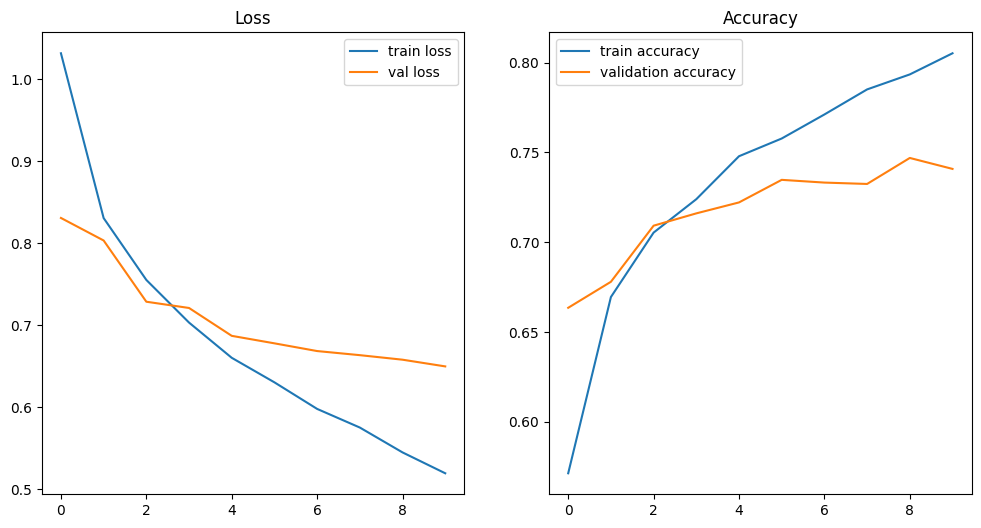

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## predictions ###############

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    return ethnicity, percentage



image_path = '/content/test_dataset/specific_dataset/asian/Harry Shum Jr..png'  # Path to the image you want to predict

ethnicity, percentage = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)

1/1 [==============================] - 1s 1s/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 55.25999069213867


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    return ethnicity, percentage



image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.16.05.png'  # Path to the image you want to predict

ethnicity, percentage = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)

1/1 [==============================] - 0s 26ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 98.02691340446472


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    return ethnicity, percentage



image_path = '/content/test_dataset/specific_dataset/indian/Abhishek Bachchan 2.png'  # Path to the image you want to predict

ethnicity, percentage = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)

1/1 [==============================] - 0s 19ms/step
Predicted Ethnicity: indian
Percentage of Predicted Ethnicity: 62.805187702178955


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    return ethnicity, percentage



image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.43.30.png'  # Path to the image you want to predict

ethnicity, percentage = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)

1/1 [==============================] - 0s 44ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 98.54542016983032


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Harry Shum Jr..png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 26ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 55.25999069213867
Percentage of Other Ethnicities:
asian: 15.96%
black: 19.21%
indian: 9.57%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.08.18.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 26ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 51.15821957588196
Percentage of Other Ethnicities:
asian: 20.22%
black: 6.89%
indian: 21.73%


# **Using RSMprop optimizer**

In [ ]:
## using another optimiser, RSMprop

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


Epoch 1/10
330/330 [==============================] - 24s 69ms/step - loss: 0.5120 - accuracy: 0.8071 - val_loss: 0.6558 - val_accuracy: 0.7462
Epoch 2/10
330/330 [==============================] - 21s 64ms/step - loss: 0.4921 - accuracy: 0.8152 - val_loss: 0.6553 - val_accuracy: 0.7454
Epoch 3/10
330/330 [==============================] - 23s 69ms/step - loss: 0.4739 - accuracy: 0.8198 - val_loss: 0.6752 - val_accuracy: 0.7435
Epoch 4/10
330/330 [==============================] - 20s 60ms/step - loss: 0.4551 - accuracy: 0.8280 - val_loss: 0.6533 - val_accuracy: 0.7454
Epoch 5/10
330/330 [==============================] - 21s 65ms/step - loss: 0.4480 - accuracy: 0.8356 - val_loss: 0.6507 - val_accuracy: 0.7473
Epoch 6/10
330/330 [==============================] - 22s 65ms/step - loss: 0.4293 - accuracy: 0.8425 - val_loss: 0.6646 - val_accuracy: 0.7504
Epoch 7/10
330/330 [==============================] - 22s 66ms/step - loss: 0.4159 - accuracy: 0.8465 - val_loss: 0.6601 - val_accuracy:

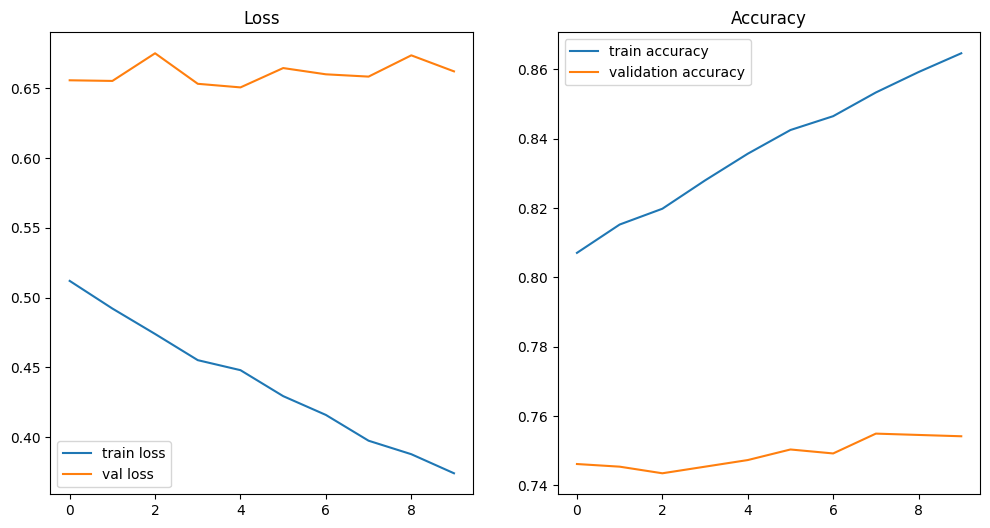

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
##### prediction #####

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.08.18.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 162ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 50.397270917892456
Percentage of Other Ethnicities:
asian: 13.19%
black: 3.36%
indian: 33.06%


# **Using SGD optimizer**

In [ ]:
### changing optimisers to SGD , learning_rate=0.00005

In [ ]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.00005, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
330/330 [==============================] - 22s 65ms/step - loss: 0.3007 - accuracy: 0.9002 - val_loss: 0.6562 - val_accuracy: 0.7603
Epoch 2/10
330/330 [==============================] - 21s 64ms/step - loss: 0.2884 - accuracy: 0.9070 - val_loss: 0.6572 - val_accuracy: 0.7576
Epoch 3/10
330/330 [==============================] - 21s 65ms/step - loss: 0.2854 - accuracy: 0.9070 - val_loss: 0.6569 - val_accuracy: 0.7595
Epoch 4/10
330/330 [==============================] - 21s 64ms/step - loss: 0.2845 - accuracy: 0.9076 - val_loss: 0.6570 - val_accuracy: 0.7591
Epoch 5/10
330/330 [==============================] - 21s 65ms/step - loss: 0.2826 - accuracy: 0.9105 - val_loss: 0.6552 - val_accuracy: 0.7595
Epoch 6/10
330/330 [==============================] - 20s 61ms/step - loss: 0.2809 - accuracy: 0.9132 - val_loss: 0.6575 - val_accuracy: 0.7561
Epoch 7/10
330/330 [==============================] - 22s 65ms/step - loss: 0.2764 - accuracy: 0.9121 - val_loss: 0.6567 - val_accuracy:

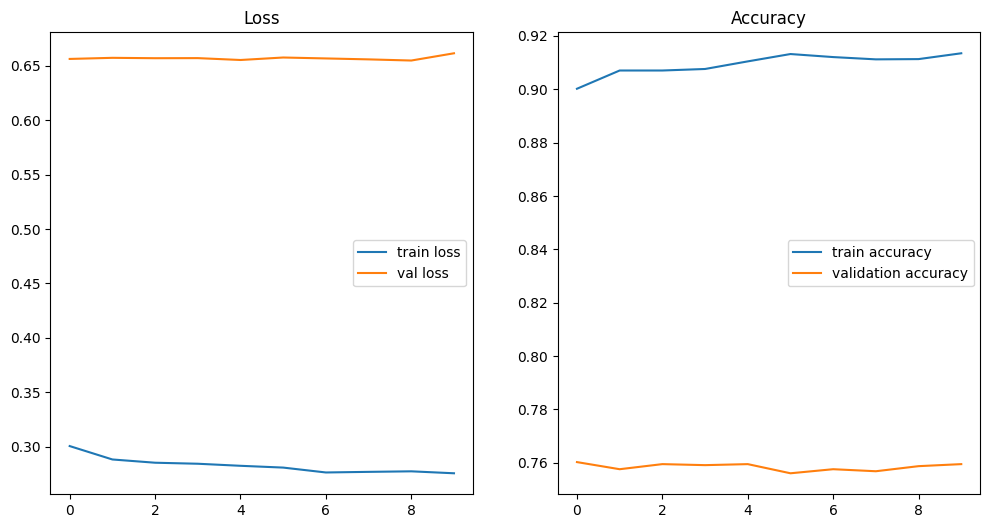

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## prediction ###

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.07.59.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 54ms/step
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 45.56542634963989
Percentage of Other Ethnicities:
black: 25.19%
indian: 2.54%
white: 26.71%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.10.35.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 53.44123840332031
Percentage of Other Ethnicities:
asian: 21.11%
black: 24.08%
indian: 1.38%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/48.jpeg'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 56.05262517929077
Percentage of Other Ethnicities:
asian: 0.46%
indian: 3.19%
white: 40.30%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.23.20.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 60ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.94780421257019
Percentage of Other Ethnicities:
asian: 0.00%
indian: 0.05%
white: 0.00%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.34.59.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 32ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 83.12618136405945
Percentage of Other Ethnicities:
asian: 0.78%
indian: 9.52%
white: 6.58%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Guneet Monga.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: indian
Percentage of Predicted Ethnicity: 57.09488391876221
Percentage of Other Ethnicities:
asian: 9.23%
black: 12.55%
white: 21.13%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Priyanka .png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 61.9187593460083
Percentage of Other Ethnicities:
asian: 0.27%
black: 33.05%
indian: 4.77%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Vir Das.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 30ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 59.11760926246643
Percentage of Other Ethnicities:
asian: 14.54%
indian: 10.36%
white: 15.98%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Emma Stone.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 79.56920862197876
Percentage of Other Ethnicities:
asian: 8.91%
black: 0.11%
indian: 11.41%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.42.57.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 71ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 63.14712166786194
Percentage of Other Ethnicities:
asian: 35.81%
black: 0.83%
indian: 0.22%


# **Using SGD optimizer and batch=64**

In [ ]:
## changing batch to 64 and optimiser SGD

In [ ]:
# Define image dimensions
img_height, img_width = 128, 128
batch_size = 64

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.00005, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
165/165 [==============================] - 27s 130ms/step - loss: 0.2696 - accuracy: 0.9134 - val_loss: 0.6564 - val_accuracy: 0.7584
Epoch 2/10
165/165 [==============================] - 19s 112ms/step - loss: 0.2732 - accuracy: 0.9098 - val_loss: 0.6599 - val_accuracy: 0.7630
Epoch 3/10
165/165 [==============================] - 21s 126ms/step - loss: 0.2725 - accuracy: 0.9118 - val_loss: 0.6578 - val_accuracy: 0.7565
Epoch 4/10
165/165 [==============================] - 21s 128ms/step - loss: 0.2733 - accuracy: 0.9123 - val_loss: 0.6590 - val_accuracy: 0.7599
Epoch 5/10
165/165 [==============================] - 21s 124ms/step - loss: 0.2694 - accuracy: 0.9131 - val_loss: 0.6586 - val_accuracy: 0.7584
Epoch 6/10
165/165 [==============================] - 21s 124ms/step - loss: 0.2710 - accuracy: 0.9120 - val_loss: 0.6624 - val_accuracy: 0.7607
Epoch 7/10
165/165 [==============================] - 20s 120ms/step - loss: 0.2717 - accuracy: 0.9147 - val_loss: 0.6587 - val_ac

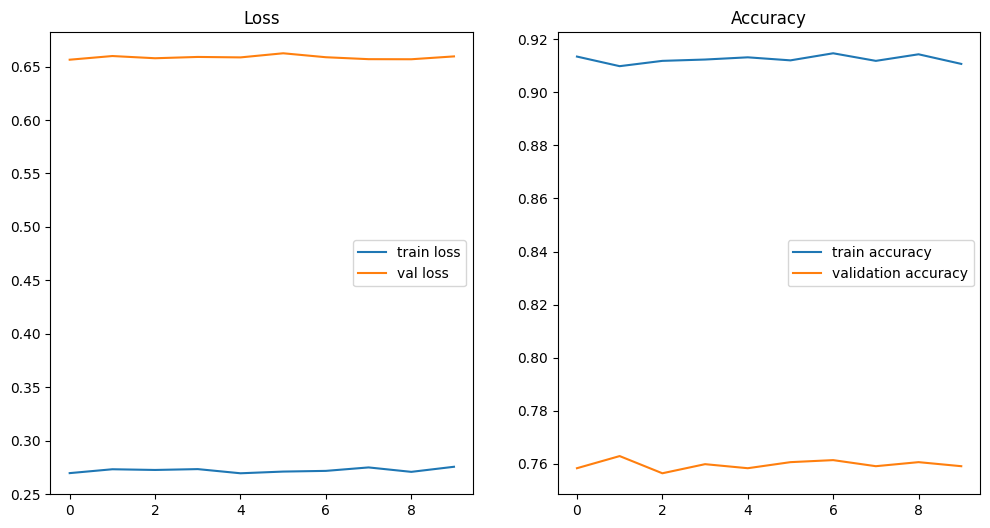

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## prediction

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Claudia Kim.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 262ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 86.97206377983093
Percentage of Other Ethnicities:
asian: 0.77%
black: 8.40%
indian: 3.85%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.33.52.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 29ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 48.13840389251709
Percentage of Other Ethnicities:
asian: 4.53%
black: 46.38%
indian: 0.95%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Himesh Reshammiya.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 30ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 63.3664608001709
Percentage of Other Ethnicities:
asian: 1.19%
indian: 22.30%
white: 13.14%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.40.07.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 32ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 98.6215353012085
Percentage of Other Ethnicities:
asian: 0.25%
black: 1.09%
indian: 0.04%


# **Using Adam optimizer & Changing the learning rate to 0.00005**

In [ ]:
## batch hamoon 64 vali opt beshe adam - .00005

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:


# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
165/165 [==============================] - 21s 123ms/step - loss: 0.2908 - accuracy: 0.9012 - val_loss: 0.6716 - val_accuracy: 0.7553
Epoch 2/10
165/165 [==============================] - 19s 112ms/step - loss: 0.2813 - accuracy: 0.9050 - val_loss: 0.6607 - val_accuracy: 0.7588
Epoch 3/10
165/165 [==============================] - 19s 115ms/step - loss: 0.2719 - accuracy: 0.9112 - val_loss: 0.6655 - val_accuracy: 0.7576
Epoch 4/10
165/165 [==============================] - 19s 116ms/step - loss: 0.2732 - accuracy: 0.9076 - val_loss: 0.6732 - val_accuracy: 0.7618
Epoch 5/10
165/165 [==============================] - 21s 125ms/step - loss: 0.2547 - accuracy: 0.9184 - val_loss: 0.6788 - val_accuracy: 0.7511
Epoch 6/10
165/165 [==============================] - 20s 124ms/step - loss: 0.2498 - accuracy: 0.9225 - val_loss: 0.6589 - val_accuracy: 0.7580
Epoch 7/10
165/165 [==============================] - 20s 124ms/step - loss: 0.2408 - accuracy: 0.9219 - val_loss: 0.6683 - val_ac

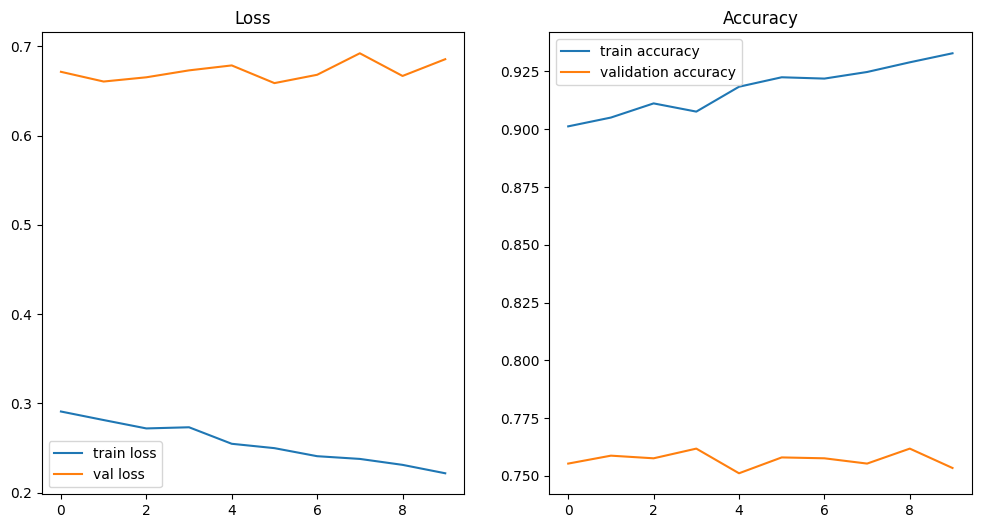

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## choon graph khub nabood prediction ham nakardam

# **Using RSMprop optimizer - Lr=0.00005**

In [ ]:
## batch 64 , opt= RSMprop 0.00005

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


Epoch 1/10
165/165 [==============================] - 23s 135ms/step - loss: 0.2221 - accuracy: 0.9294 - val_loss: 0.6901 - val_accuracy: 0.7561
Epoch 2/10
165/165 [==============================] - 19s 116ms/step - loss: 0.2153 - accuracy: 0.9290 - val_loss: 0.7015 - val_accuracy: 0.7530
Epoch 3/10
165/165 [==============================] - 23s 136ms/step - loss: 0.2094 - accuracy: 0.9343 - val_loss: 0.6828 - val_accuracy: 0.7576
Epoch 4/10
165/165 [==============================] - 21s 124ms/step - loss: 0.2041 - accuracy: 0.9384 - val_loss: 0.6916 - val_accuracy: 0.7576
Epoch 5/10
165/165 [==============================] - 21s 129ms/step - loss: 0.1986 - accuracy: 0.9392 - val_loss: 0.6965 - val_accuracy: 0.7565
Epoch 6/10
165/165 [==============================] - 20s 124ms/step - loss: 0.1920 - accuracy: 0.9414 - val_loss: 0.7129 - val_accuracy: 0.7492
Epoch 7/10
165/165 [==============================] - 19s 117ms/step - loss: 0.1872 - accuracy: 0.9446 - val_loss: 0.7005 - val_ac

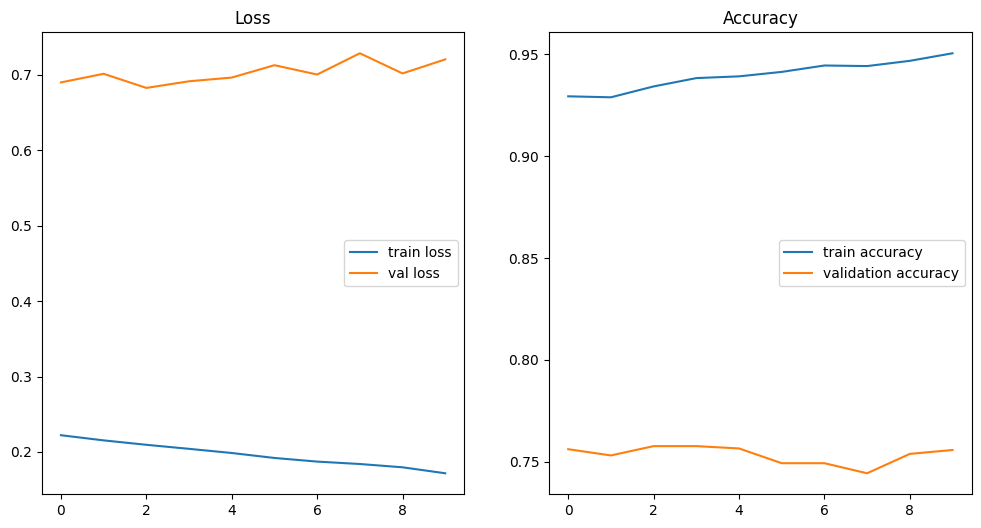

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## graph khub nabood prediction nakardam

# **Using RSMprop optimizer - Lr=0.0001 - batch=32**

In [ ]:
## batch = 32 , opt= RSMprop - 0.0001

In [ ]:
# Define image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
330/330 [==============================] - 25s 73ms/step - loss: 0.2420 - accuracy: 0.9125 - val_loss: 0.7355 - val_accuracy: 0.7538
Epoch 2/10
330/330 [==============================] - 22s 67ms/step - loss: 0.2287 - accuracy: 0.9173 - val_loss: 0.7710 - val_accuracy: 0.7542
Epoch 3/10
330/330 [==============================] - 20s 62ms/step - loss: 0.2198 - accuracy: 0.9203 - val_loss: 0.8185 - val_accuracy: 0.7409
Epoch 4/10
330/330 [==============================] - 21s 62ms/step - loss: 0.2124 - accuracy: 0.9258 - val_loss: 0.7916 - val_accuracy: 0.7530
Epoch 5/10
330/330 [==============================] - 21s 64ms/step - loss: 0.2063 - accuracy: 0.9246 - val_loss: 0.7591 - val_accuracy: 0.7470
Epoch 6/10
330/330 [==============================] - 22s 66ms/step - loss: 0.1968 - accuracy: 0.9320 - val_loss: 0.8394 - val_accuracy: 0.7401
Epoch 7/10
330/330 [==============================] - 22s 66ms/step - loss: 0.1922 - accuracy: 0.9316 - val_loss: 0.7565 - val_accuracy:

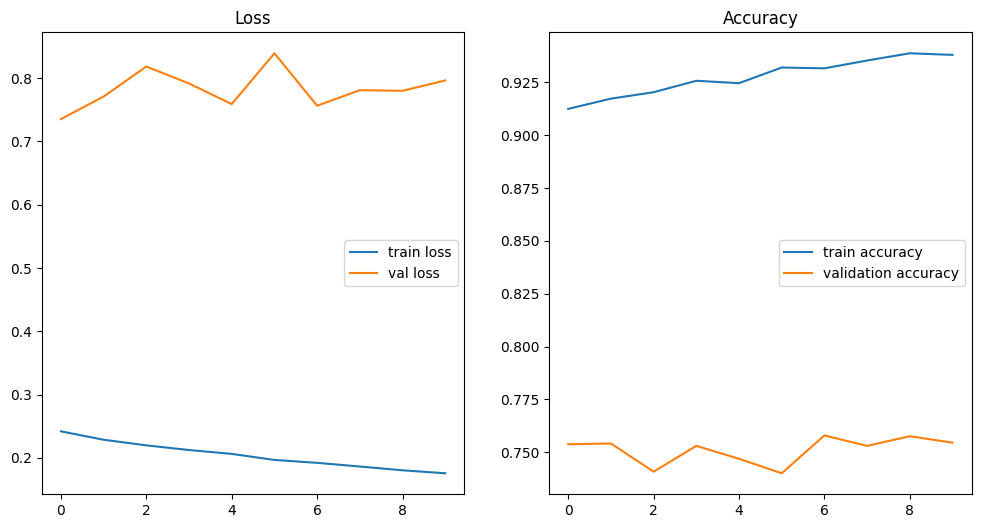

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## through the previous code i want the epoch 9 , so i re run the model but this time with 9 epochs

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=9,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/9
330/330 [==============================] - 23s 68ms/step - loss: 0.1620 - accuracy: 0.9431 - val_loss: 0.8219 - val_accuracy: 0.7515
Epoch 2/9
330/330 [==============================] - 21s 62ms/step - loss: 0.1570 - accuracy: 0.9465 - val_loss: 0.8437 - val_accuracy: 0.7550
Epoch 3/9
330/330 [==============================] - 21s 64ms/step - loss: 0.1511 - accuracy: 0.9483 - val_loss: 0.8591 - val_accuracy: 0.7428
Epoch 4/9
330/330 [==============================] - 21s 63ms/step - loss: 0.1475 - accuracy: 0.9521 - val_loss: 0.8078 - val_accuracy: 0.7553
Epoch 5/9
330/330 [==============================] - 22s 68ms/step - loss: 0.1513 - accuracy: 0.9477 - val_loss: 0.8329 - val_accuracy: 0.7481
Epoch 6/9
330/330 [==============================] - 21s 64ms/step - loss: 0.1432 - accuracy: 0.9517 - val_loss: 0.8563 - val_accuracy: 0.7450
Epoch 7/9
330/330 [==============================] - 21s 64ms/step - loss: 0.1396 - accuracy: 0.9532 - val_loss: 0.8414 - val_accuracy: 0.7542

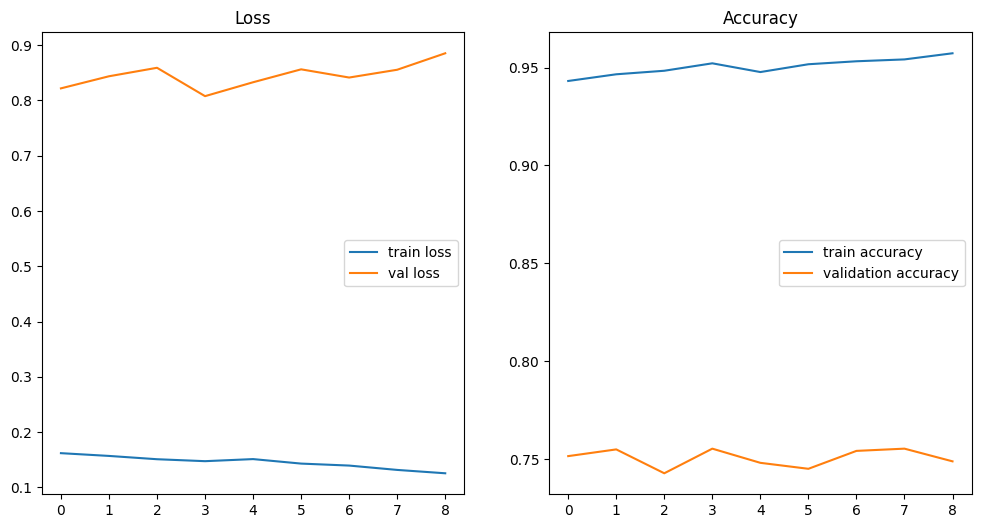

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## prediction male halate 9 epochs

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.40.07.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 179ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 99.95962977409363
Percentage of Other Ethnicities:
asian: 0.02%
black: 0.02%
indian: 0.00%


In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/asian/Arden Cho.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 98.54823350906372
Percentage of Other Ethnicities:
asian: 1.45%
black: 0.00%
indian: 0.00%

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.19.56.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 83.02712440490723
Percentage of Other Ethnicities:
asian: 16.06%
indian: 0.03%
white: 0.88%

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/black/Taraji P. Henson.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 94.39012408256531
Percentage of Other Ethnicities:
asian: 0.00%
black: 2.50%
indian: 3.11%

1/1 [==============================] - 0s 21ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.18.15.png
Predicted 

# **Using Adam optimizer-Lr=0.0001 and batch=32**

In [ ]:
## batch=32, epoch=10, opt=adam - 0.0001

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
330/330 [==============================] - 24s 68ms/step - loss: 0.1298 - accuracy: 0.9576 - val_loss: 0.8577 - val_accuracy: 0.7485
Epoch 2/10
330/330 [==============================] - 22s 66ms/step - loss: 0.1158 - accuracy: 0.9651 - val_loss: 0.8645 - val_accuracy: 0.7546
Epoch 3/10
330/330 [==============================] - 22s 66ms/step - loss: 0.1190 - accuracy: 0.9617 - val_loss: 0.8677 - val_accuracy: 0.7508
Epoch 4/10
330/330 [==============================] - 22s 68ms/step - loss: 0.1054 - accuracy: 0.9673 - val_loss: 0.9105 - val_accuracy: 0.7595
Epoch 5/10
330/330 [==============================] - 21s 64ms/step - loss: 0.1069 - accuracy: 0.9672 - val_loss: 0.8508 - val_accuracy: 0.7553
Epoch 6/10
330/330 [==============================] - 21s 64ms/step - loss: 0.0998 - accuracy: 0.9696 - val_loss: 0.8981 - val_accuracy: 0.7500
Epoch 7/10
330/330 [==============================] - 22s 67ms/step - loss: 0.1031 - accuracy: 0.9687 - val_loss: 0.8566 - val_accuracy:

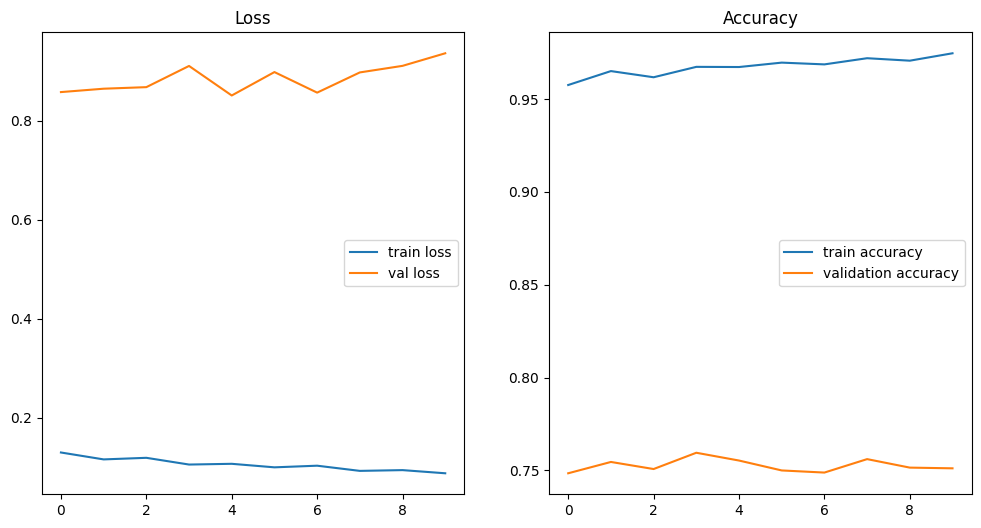

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# **Using data augmentation with RMSprop omptimizer-Lr=0.0001, batch=32**

In [ ]:
## batch=32, epoch=10, opt= RMSprop(learning_rate=0.0001), data augmentation

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
330/330 [==============================] - 59s 173ms/step - loss: 1.0578 - accuracy: 0.6074 - val_loss: 0.7302 - val_accuracy: 0.7058
Epoch 2/10
330/330 [==============================] - 57s 174ms/step - loss: 0.9696 - accuracy: 0.6219 - val_loss: 0.7263 - val_accuracy: 0.7245
Epoch 3/10
330/330 [==============================] - 57s 174ms/step - loss: 0.9458 - accuracy: 0.6324 - val_loss: 0.7021 - val_accuracy: 0.7260
Epoch 4/10
330/330 [==============================] - 58s 175ms/step - loss: 0.9257 - accuracy: 0.6287 - val_loss: 0.7288 - val_accuracy: 0.7199
Epoch 5/10
330/330 [==============================] - 58s 176ms/step - loss: 0.9322 - accuracy: 0.6354 - val_loss: 0.7067 - val_accuracy: 0.7271
Epoch 6/10
330/330 [==============================] - 57s 174ms/step - loss: 0.9068 - accuracy: 0.6453 - val_loss: 0.6969 - val_accuracy: 0.7355
Epoch 7/10
330/330 [==============================] - 56s 170ms/step - loss: 0.9017 - accuracy: 0.6486 - val_loss: 0.7022 - val_ac

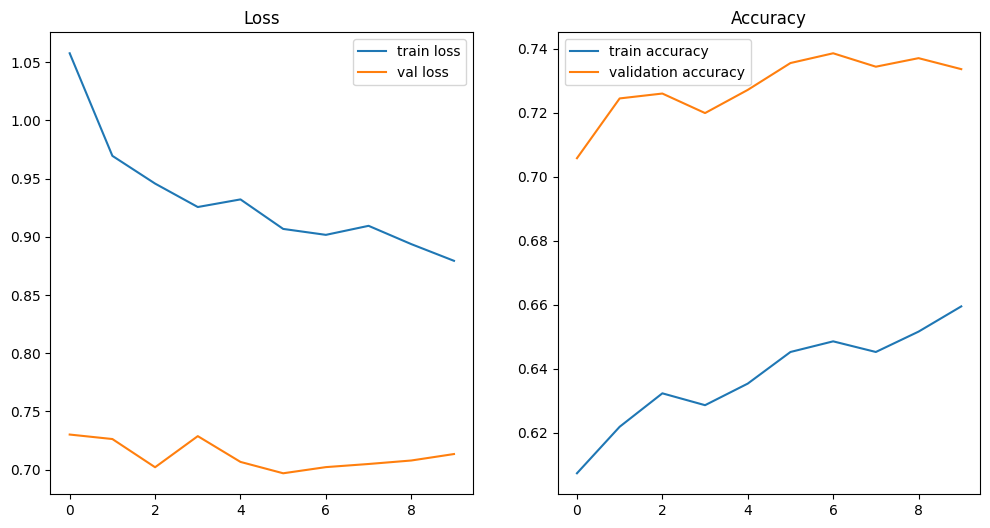

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 394ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.15.36.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 42.6843136548996
Percentage of Other Ethnicities:
asian: 33.15%
black: 14.10%
indian: 10.06%

1/1 [==============================] - 0s 53ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.17.34.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 80.74565529823303
Percentage of Other Ethnicities:
black: 1.45%
indian: 4.40%
white: 13.40%

1/1 [==============================] - 0s 47ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.29.59.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 87.32443451881409
Percentage of Other Ethnicities:
asian: 0.08%
indian: 9.91%
white: 2.68%

1/1 [==============================] - 0s 83ms/step
Image: /content/test_dataset/specific_dataset/black/Scre

# **Adjusting layers**

In [ ]:
############# the best model ##################

In [ ]:
###### adjusting layers #######

In [ ]:
# 1-
## using another fine tunning by adjasting layers
## beside using data augmentation
# batch =32, epoch = 10, opt = RSMprop - 0.0001

In [ ]:
# Instead of freezing all the layers of the pre-trained VGG19 model, you can try fine-tuning some of the later layers.
# This allows the model to adapt and learn more specific features from your dataset

from tensorflow.keras import models
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers[-4:]:
    layer.trainable = True

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add another fully-connected layer
x = Dense(512, activation='relu')(x)

# Add another fully-connected layer with 256 units and 'sigmoid' activation
x = Dense(256, activation='relu')(x)

# Add a logistic layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)




In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


Epoch 1/10
330/330 [==============================] - 106s 290ms/step - loss: 1.2098 - accuracy: 0.4904 - val_loss: 0.8807 - val_accuracy: 0.6643
Epoch 2/10
330/330 [==============================] - 93s 282ms/step - loss: 0.8879 - accuracy: 0.6528 - val_loss: 0.5947 - val_accuracy: 0.7782
Epoch 3/10
330/330 [==============================] - 71s 216ms/step - loss: 0.6993 - accuracy: 0.7377 - val_loss: 0.6153 - val_accuracy: 0.7527
Epoch 4/10
330/330 [==============================] - 72s 218ms/step - loss: 0.6044 - accuracy: 0.7791 - val_loss: 0.4595 - val_accuracy: 0.8365
Epoch 5/10
330/330 [==============================] - 71s 215ms/step - loss: 0.5412 - accuracy: 0.8052 - val_loss: 0.4719 - val_accuracy: 0.8277
Epoch 6/10
330/330 [==============================] - 73s 220ms/step - loss: 0.5005 - accuracy: 0.8195 - val_loss: 0.4186 - val_accuracy: 0.8544
Epoch 7/10
330/330 [==============================] - 73s 220ms/step - loss: 0.4526 - accuracy: 0.8376 - val_loss: 0.4769 - val_a

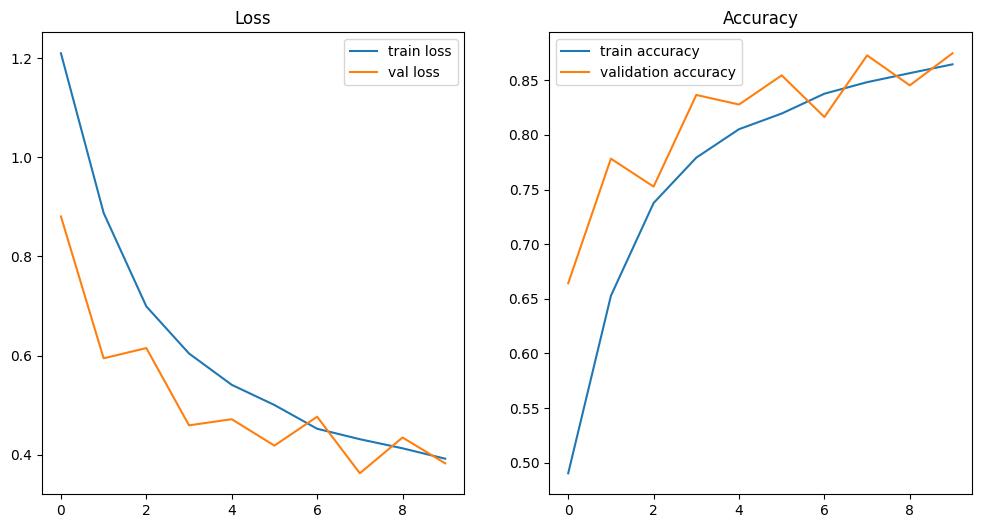

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## prediction

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 249ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.09.46.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 99.72278475761414
Percentage of Other Ethnicities:
black: 0.00%
indian: 0.03%
white: 0.25%

1/1 [==============================] - 0s 27ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.11.31.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 63.444024324417114
Percentage of Other Ethnicities:
black: 14.00%
indian: 5.06%
white: 17.50%

1/1 [==============================] - 0s 25ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.29.22.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.35653805732727
Percentage of Other Ethnicities:
asian: 0.01%
indian: 0.11%
white: 0.53%

1/1 [==============================] - 0s 26ms/step
Image: /content/test_dataset/specific_dataset/black/Scre

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.10.35.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 90.90123772621155
Percentage of Other Ethnicities:
black: 0.62%
indian: 1.95%
white: 6.53%

1/1 [==============================] - 0s 38ms/step
Image: /content/test_dataset/specific_dataset/asian/Lana Condor.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 79.42429184913635
Percentage of Other Ethnicities:
asian: 5.22%
indian: 7.67%
white: 7.68%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.26.52.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 98.88134598731995
Percentage of Other Ethnicities:
asian: 0.12%
indian: 0.21%
white: 0.79%

1/1 [==============================] - 0s 28ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.27

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 43ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.12.36.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 98.23499917984009
Percentage of Other Ethnicities:
black: 0.39%
indian: 0.36%
white: 1.02%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Hoyeon Jung.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 98.66147637367249
Percentage of Other Ethnicities:
black: 0.26%
indian: 0.37%
white: 0.71%

1/1 [==============================] - 0s 32ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.33.52.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.02271032333374
Percentage of Other Ethnicities:
asian: 0.08%
indian: 0.25%
white: 0.65%

1/1 [==============================] - 0s 38ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.16

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/asian/Harry Shum Jr..png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 77.86418795585632
Percentage of Other Ethnicities:
black: 2.19%
indian: 2.64%
white: 17.31%

1/1 [==============================] - 0s 17ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.09.46.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 99.72278475761414
Percentage of Other Ethnicities:
black: 0.00%
indian: 0.03%
white: 0.25%

1/1 [==============================] - 0s 21ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.17.18.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.81980919837952
Percentage of Other Ethnicities:
asian: 0.00%
indian: 0.01%
white: 0.17%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/146.jpg
Predicted Ethnicit

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 32ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.17.48.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 56.74561858177185
Percentage of Other Ethnicities:
asian: 32.87%
black: 7.57%
indian: 2.82%

1/1 [==============================] - 0s 27ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.09.46.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 99.72278475761414
Percentage of Other Ethnicities:
black: 0.00%
indian: 0.03%
white: 0.25%

1/1 [==============================] - 0s 55ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.22.19.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.79379773139954
Percentage of Other Ethnicities:
asian: 0.00%
indian: 0.01%
white: 0.20%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screens

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.02.10.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 73.242849111557
Percentage of Other Ethnicities:
black: 14.65%
indian: 8.19%
white: 3.91%

1/1 [==============================] - 0s 32ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.08.52.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 99.64233040809631
Percentage of Other Ethnicities:
black: 0.00%
indian: 0.02%
white: 0.34%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.31.24.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.56722259521484
Percentage of Other Ethnicities:
asian: 0.01%
indian: 0.04%
white: 0.38%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/black/Screensho

In [ ]:
### one by one prediction ###

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

image_path = '/content/test_dataset/specific_dataset/asian/Arden Cho.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 97.71103858947754
Percentage of Other Ethnicities:
black: 0.05%
indian: 0.21%
white: 2.03%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/Awkwafina.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 26ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 88.51665258407593
Percentage of Other Ethnicities:
asian: 11.02%
black: 0.11%
indian: 0.36%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/asian/John Harlan Kim.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 28ms/step
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 87.75054216384888
Percentage of Other Ethnicities:
black: 0.69%
indian: 1.01%
white: 10.54%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/256.jpg'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 31ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 98.91963005065918
Percentage of Other Ethnicities:
asian: 0.02%
indian: 0.08%
white: 0.99%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.16.05.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 31ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.00611639022827
Percentage of Other Ethnicities:
asian: 0.07%
indian: 0.17%
white: 0.76%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.21.30.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 30ms/step
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 94.02058720588684
Percentage of Other Ethnicities:
asian: 0.53%
indian: 0.88%
white: 4.57%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Shruti Haasan.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: indian
Percentage of Predicted Ethnicity: 96.24090790748596
Percentage of Other Ethnicities:
asian: 0.79%
black: 1.47%
white: 1.50%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/aswariya rai.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: indian
Percentage of Predicted Ethnicity: 97.8801429271698
Percentage of Other Ethnicities:
asian: 0.10%
black: 2.01%
white: 0.02%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/indian/Vir Das.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 31ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 78.25712561607361
Percentage of Other Ethnicities:
asian: 1.98%
black: 3.26%
indian: 16.51%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Brad Pitt.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 99.88045692443848
Percentage of Other Ethnicities:
asian: 0.09%
black: 0.01%
indian: 0.02%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Kit Harington.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 96.74619436264038
Percentage of Other Ethnicities:
asian: 0.57%
black: 1.05%
indian: 1.63%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.43.30.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

1/1 [==============================] - 0s 27ms/step
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 98.97253513336182
Percentage of Other Ethnicities:
asian: 0.10%
black: 0.24%
indian: 0.69%


In [ ]:
## random whites

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
white_ethnicity_dir = '/content/test_dataset/specific_dataset/white'
#Black_ethnicity_dir = '/content/test_dataset/specific_dataset/Black'
#Asian_ethnicity_dir = '/content/test_dataset/specific_dataset/Asian'
#Indian_ethnicity_dir = '/content/test_dataset/specific_dataset/Indian'


# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(white_ethnicity_dir, num_images=10):
    image_files = os.listdir(white_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(white_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(white_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 76ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.41.31.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 91.90799593925476
Percentage of Other Ethnicities:
asian: 4.37%
black: 0.91%
indian: 2.82%

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.43.46.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 97.51933217048645
Percentage of Other Ethnicities:
asian: 0.30%
black: 1.07%
indian: 1.10%

1/1 [==============================] - 0s 19ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.46.30.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 99.72946047782898
Percentage of Other Ethnicities:
asian: 0.21%
black: 0.02%
indian: 0.05%

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/white/Screensh

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
white_ethnicity_dir = '/content/test_dataset/specific_dataset/white'
#black_ethnicity_dir = '/content/test_dataset/specific_dataset/black'
#indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'
#asian_ethnicity_dir = '/content/test_dataset/specific_dataset/asian'

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(white_ethnicity_dir, num_images=20):
    image_files = os.listdir(white_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(white_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(white_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 55ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.48.44.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 97.15086221694946
Percentage of Other Ethnicities:
asian: 0.78%
black: 1.16%
indian: 0.91%

1/1 [==============================] - 0s 54ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.49.16.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 96.95247411727905
Percentage of Other Ethnicities:
asian: 0.44%
black: 1.49%
indian: 1.11%

1/1 [==============================] - 0s 59ms/step
Image: /content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.42.42.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 92.15241074562073
Percentage of Other Ethnicities:
asian: 1.18%
black: 3.25%
indian: 3.41%

1/1 [==============================] - 0s 68ms/step
Image: /content/test_dataset/specific_dataset/white/Screensh

In [ ]:
## random blacks

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
black_ethnicity_dir = '/content/test_dataset/specific_dataset/black'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(black_ethnicity_dir, num_images=10):
    image_files = os.listdir(black_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(black_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(black_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 19ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.29.41.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.98273253440857
Percentage of Other Ethnicities:
asian: 0.00%
indian: 0.00%
white: 0.02%

1/1 [==============================] - 0s 17ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.22.58.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 95.76391577720642
Percentage of Other Ethnicities:
asian: 0.26%
indian: 0.41%
white: 3.57%

1/1 [==============================] - 0s 18ms/step
Image: /content/test_dataset/specific_dataset/black/257.jpg
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 99.96234178543091
Percentage of Other Ethnicities:
asian: 0.00%
indian: 0.00%
white: 0.04%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.16.28.png


In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
black_ethnicity_dir = '/content/test_dataset/specific_dataset/black'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(black_ethnicity_dir, num_images=20):
    image_files = os.listdir(black_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(black_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(black_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.34.07.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 96.77236676216125
Percentage of Other Ethnicities:
asian: 0.21%
indian: 1.39%
white: 1.63%

1/1 [==============================] - 0s 33ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.22.58.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 95.76391577720642
Percentage of Other Ethnicities:
asian: 0.26%
indian: 0.41%
white: 3.57%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.30.32.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 91.8095350265503
Percentage of Other Ethnicities:
asian: 1.71%
indian: 1.80%
white: 4.68%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/black/Screensho

In [ ]:
## asian

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
asian_ethnicity_dir = '/content/test_dataset/specific_dataset/asian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(asian_ethnicity_dir, num_images=10):
    image_files = os.listdir(asian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(asian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(asian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 26ms/step
Image: /content/test_dataset/specific_dataset/asian/Jamie Chung.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 75.51908493041992
Percentage of Other Ethnicities:
black: 18.19%
indian: 3.45%
white: 2.84%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Manny Jacinto.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 99.25238490104675
Percentage of Other Ethnicities:
black: 0.02%
indian: 0.09%
white: 0.63%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.17.12.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 81.33297562599182
Percentage of Other Ethnicities:
asian: 16.61%
black: 0.84%
indian: 1.23%

1/1 [==============================] - 0s 32ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.07.59.png
Predicted 

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
asian_ethnicity_dir = '/content/test_dataset/specific_dataset/asian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(asian_ethnicity_dir, num_images=20):
    image_files = os.listdir(asian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(asian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(asian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 26ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.10.16.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 50.39281249046326
Percentage of Other Ethnicities:
black: 1.42%
indian: 1.87%
white: 46.32%

1/1 [==============================] - 0s 27ms/step
Image: /content/test_dataset/specific_dataset/asian/Henry Golding.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 51.77640914916992
Percentage of Other Ethnicities:
black: 4.05%
indian: 4.35%
white: 39.82%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.18.23.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 51.490163803100586
Percentage of Other Ethnicities:
black: 16.33%
indian: 5.90%
white: 26.28%

1/1 [==============================] - 0s 34ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 a

In [ ]:
## indian

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=10):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 28ms/step
Image: /content/test_dataset/specific_dataset/indian/Aamir Khan 4.png
Predicted Ethnicity: asian
Percentage of Predicted Ethnicity: 59.50387716293335
Percentage of Other Ethnicities:
black: 13.42%
indian: 7.05%
white: 20.03%

1/1 [==============================] - 0s 60ms/step
Image: /content/test_dataset/specific_dataset/indian/Samantha Ruth Prabhu.png
Predicted Ethnicity: indian
Percentage of Predicted Ethnicity: 87.03653216362
Percentage of Other Ethnicities:
asian: 1.07%
black: 1.43%
white: 10.46%

1/1 [==============================] - 0s 62ms/step
Image: /content/test_dataset/specific_dataset/indian/John Abraham.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 73.55677485466003
Percentage of Other Ethnicities:
asian: 4.23%
indian: 15.18%
white: 7.03%

1/1 [==============================] - 0s 43ms/step
Image: /content/test_dataset/specific_dataset/indian/Deepika Padukone.png
Predicted Ethnicity: black
Percentage

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=20):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 26ms/step
Image: /content/test_dataset/specific_dataset/indian/Aamir Khan 3.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 83.6100161075592
Percentage of Other Ethnicities:
asian: 1.28%
indian: 1.53%
white: 13.58%

1/1 [==============================] - 0s 37ms/step
Image: /content/test_dataset/specific_dataset/indian/Guneet Monga 2.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 95.30974626541138
Percentage of Other Ethnicities:
asian: 0.11%
black: 0.33%
indian: 4.25%

1/1 [==============================] - 0s 27ms/step
Image: /content/test_dataset/specific_dataset/indian/Karishma Tanna.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 37.887391448020935
Percentage of Other Ethnicities:
asian: 4.52%
black: 32.54%
indian: 25.05%

1/1 [==============================] - 0s 31ms/step
Image: /content/test_dataset/specific_dataset/indian/om puri.png
Predicted Ethnicity: white
Percentage of Predict

# **Adding 5 more epochs**

In [ ]:
## re run the previous model one more time with 5 epochs

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/5
330/330 [==============================] - 82s 248ms/step - loss: 0.3530 - accuracy: 0.8773 - val_loss: 0.4782 - val_accuracy: 0.8498
Epoch 2/5
330/330 [==============================] - 74s 225ms/step - loss: 0.3430 - accuracy: 0.8824 - val_loss: 0.3439 - val_accuracy: 0.8883
Epoch 3/5
330/330 [==============================] - 83s 250ms/step - loss: 0.3182 - accuracy: 0.8937 - val_loss: 0.3644 - val_accuracy: 0.8819
Epoch 4/5
330/330 [==============================] - 72s 218ms/step - loss: 0.3097 - accuracy: 0.8950 - val_loss: 0.4429 - val_accuracy: 0.8655
Epoch 5/5
83/83 [==============================] - 4s 51ms/step - loss: 0.3424 - accuracy: 0.8774
Validation Loss: 0.34240686893463135
Validation Accuracy: 0.8774120211601257
Found 241 images belonging to 4 classes.
8/8 [==============================] - 1s 166ms/step - loss: 0.5917 - accuracy: 0.7635
Test Accuracy: 0.7634854912757874
Test Loss: 0.5917015075683594


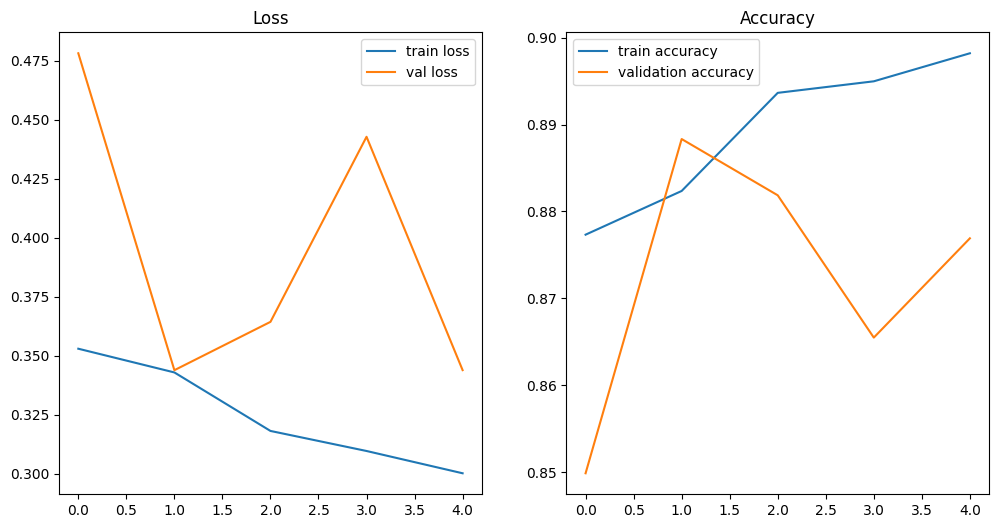

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# **Epoch = 4**

In [ ]:
### i put the epoch = 4

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=4,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/4
330/330 [==============================] - 81s 246ms/step - loss: 0.2851 - accuracy: 0.9013 - val_loss: 0.3654 - val_accuracy: 0.8792
Epoch 2/4
330/330 [==============================] - 75s 226ms/step - loss: 0.2778 - accuracy: 0.9064 - val_loss: 0.3875 - val_accuracy: 0.8765
Epoch 3/4
330/330 [==============================] - 74s 225ms/step - loss: 0.2632 - accuracy: 0.9112 - val_loss: 0.3829 - val_accuracy: 0.8773
Epoch 4/4
83/83 [==============================] - 4s 51ms/step - loss: 0.3660 - accuracy: 0.8789
Validation Loss: 0.3660004436969757
Validation Accuracy: 0.8789254426956177
Found 241 images belonging to 4 classes.
8/8 [==============================] - 2s 221ms/step - loss: 0.9728 - accuracy: 0.6349
Test Accuracy: 0.634854793548584
Test Loss: 0.9727890491485596


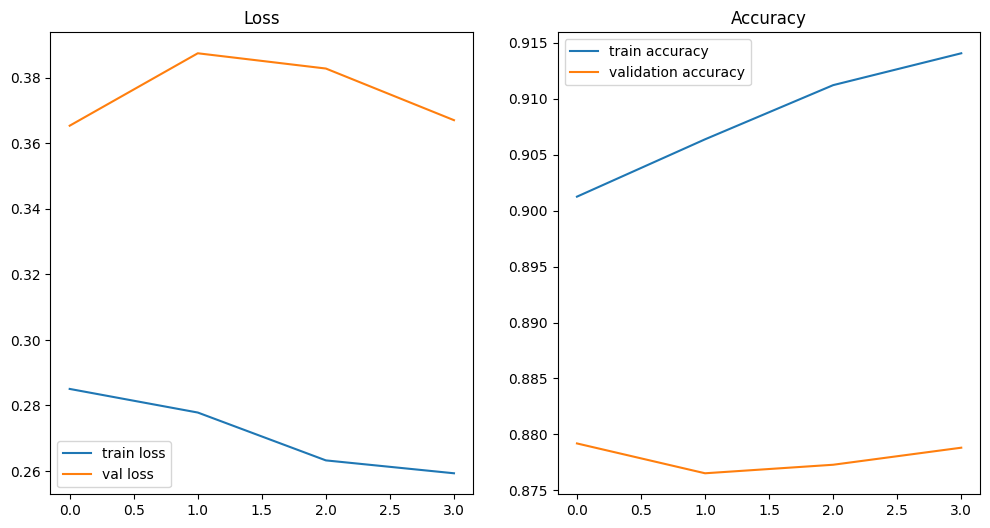

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## this time i try not to use a data augmentation

In [ ]:
## this time i try not to use a data augmentation


# **Trying without data augmentation**

In [ ]:
num_classes = 4

# Define image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10564 images belonging to 4 classes.
Found 2643 images belonging to 4 classes.


In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/5
330/330 [==============================] - 59s 179ms/step - loss: 0.1924 - accuracy: 0.9398 - val_loss: 0.3822 - val_accuracy: 0.8895
Epoch 2/5
330/330 [==============================] - 60s 182ms/step - loss: 0.1450 - accuracy: 0.9534 - val_loss: 0.4667 - val_accuracy: 0.8845
Epoch 3/5
330/330 [==============================] - 61s 186ms/step - loss: 0.1181 - accuracy: 0.9610 - val_loss: 0.5615 - val_accuracy: 0.8826
Epoch 4/5
330/330 [==============================] - 58s 176ms/step - loss: 0.1085 - accuracy: 0.9659 - val_loss: 0.4431 - val_accuracy: 0.8758
Epoch 5/5
83/83 [==============================] - 4s 49ms/step - loss: 0.6358 - accuracy: 0.8793
Validation Loss: 0.6357583999633789
Validation Accuracy: 0.8793038129806519
Found 241 images belonging to 4 classes.
8/8 [==============================] - 1s 155ms/step - loss: 1.3164 - accuracy: 0.6722
Test Accuracy: 0.6721991896629333
Test Loss: 1.3164069652557373


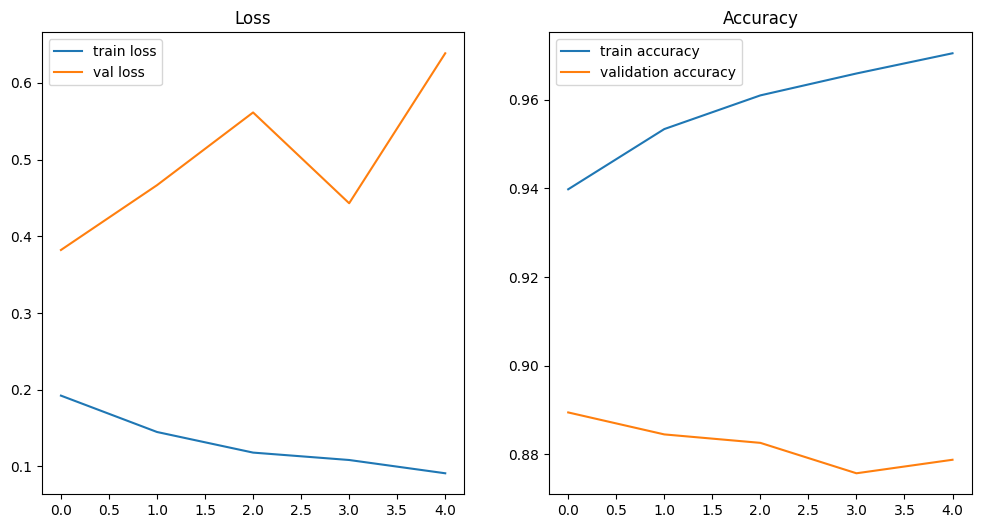

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## prediction

In [ ]:
## for random 10 pictures

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

In [ ]:
## for each ethnicity

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=20):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=20):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=20):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

In [ ]:
import os
import random

# Define the directory containing images for the "white" ethnicity
indian_ethnicity_dir = '/content/test_dataset/specific_dataset/indian'

# Load your trained model here
# model = ...

# Function to randomly select 10 image paths from the "white" ethnicity category
def select_random_white_images(indian_ethnicity_dir, num_images=20):
    image_files = os.listdir(indian_ethnicity_dir)
    random.shuffle(image_files)
    selected_images = [os.path.join(indian_ethnicity_dir, fname) for fname in image_files[:num_images]]
    return selected_images

# Predict ethnicity for each randomly selected image
random_white_image_paths = select_random_white_images(indian_ethnicity_dir)
for image_path in random_white_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

In [ ]:
## try one by one images

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(image_path, target_size=(128, 128)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded

def predict_ethnicity(model, image_path):
    processed_image = load_and_prepare_image(image_path)
    predictions = model.predict(processed_image)
    ethnicity_labels = ['asian', 'black', 'indian', 'white']
    predicted_index = np.argmax(predictions)
    ethnicity = ethnicity_labels[predicted_index]
    percentage = predictions[0][predicted_index] * 100

    # Get percentages of other ethnicities
    other_percentages = {ethnicity_labels[i]: predictions[0][i] * 100 for i in range(len(ethnicity_labels)) if i != predicted_index}

    return ethnicity, percentage, other_percentages

# Load your trained model here
# model = ...

image_path = '/content/test_dataset/specific_dataset/white/Screenshot 2024-04-17 at 14.40.07.png'  # Path to the image you want to predict

ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
print("Predicted Ethnicity:", ethnicity)
print("Percentage of Predicted Ethnicity:", percentage)
print("Percentage of Other Ethnicities:")
for label, percent in other_percentages.items():
    print(f"{label}: {percent:.2f}%")

In [ ]:
## previous code with just 1 epoch

In [ ]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/5
330/330 [==============================] - 58s 175ms/step - loss: 0.0816 - accuracy: 0.9769 - val_loss: 0.4702 - val_accuracy: 0.8716
Epoch 2/5
330/330 [==============================] - 58s 176ms/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.6145 - val_accuracy: 0.8712
Epoch 3/5
330/330 [==============================] - 59s 178ms/step - loss: 0.0622 - accuracy: 0.9817 - val_loss: 0.6090 - val_accuracy: 0.8754
Epoch 4/5
330/330 [==============================] - 59s 178ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.6746 - val_accuracy: 0.8815
Epoch 5/5
83/83 [==============================] - 4s 49ms/step - loss: 0.6240 - accuracy: 0.8691
Validation Loss: 0.6240042448043823
Validation Accuracy: 0.8690881729125977
Found 241 images belonging to 4 classes.
8/8 [==============================] - 2s 200ms/step - loss: 1.2056 - accuracy: 0.6722
Test Accuracy: 0.6721991896629333
Test Loss: 1.2056111097335815


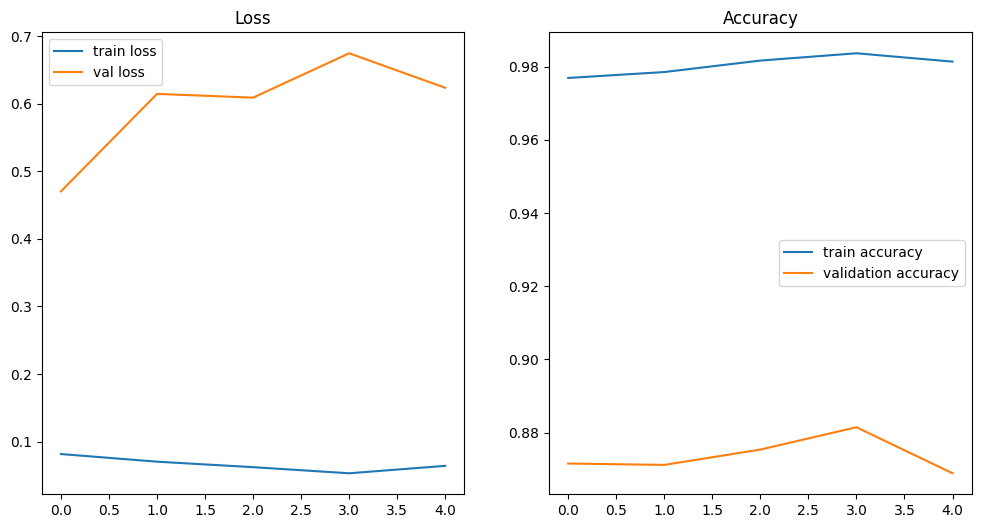

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
## the model above is not good

In [ ]:
## i use another changes to the layers, without data augmentation

In [ ]:
# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))  # Additional dense layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))  # Additional dense layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Output layer with 4 classes for ethnicities

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])

Epoch 1/10
330/330 [==============================] - 21s 61ms/step - loss: 1.3153 - accuracy: 0.4176 - val_loss: 1.1615 - val_accuracy: 0.5606
Epoch 2/10
330/330 [==============================] - 21s 64ms/step - loss: 1.1316 - accuracy: 0.5082 - val_loss: 1.0026 - val_accuracy: 0.6082
Epoch 3/10
330/330 [==============================] - 21s 65ms/step - loss: 1.0357 - accuracy: 0.5618 - val_loss: 0.9402 - val_accuracy: 0.6181
Epoch 4/10
330/330 [==============================] - 21s 64ms/step - loss: 0.9742 - accuracy: 0.5966 - val_loss: 0.8621 - val_accuracy: 0.6555
Epoch 5/10
330/330 [==============================] - 21s 65ms/step - loss: 0.9081 - accuracy: 0.6341 - val_loss: 0.8565 - val_accuracy: 0.6555
Epoch 6/10
330/330 [==============================] - 21s 65ms/step - loss: 0.8764 - accuracy: 0.6552 - val_loss: 0.8225 - val_accuracy: 0.6772
Epoch 7/10
330/330 [==============================] - 22s 66ms/step - loss: 0.8354 - accuracy: 0.6790 - val_loss: 0.7589 - val_accuracy:

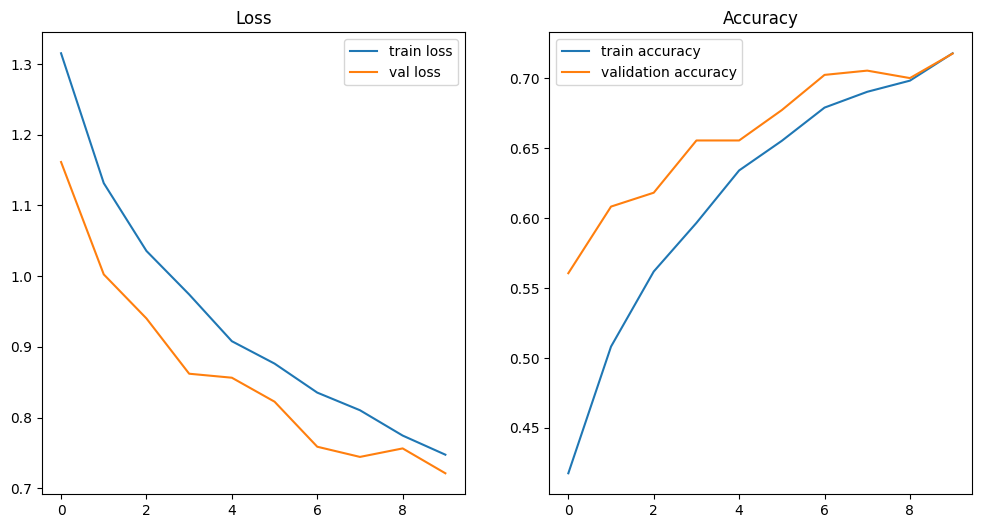

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 288ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.19.28.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 44.38459277153015
Percentage of Other Ethnicities:
asian: 42.80%
black: 4.60%
indian: 8.21%

1/1 [==============================] - 0s 39ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.11.16.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 61.59281134605408
Percentage of Other Ethnicities:
asian: 22.70%
black: 5.85%
indian: 9.86%

1/1 [==============================] - 0s 35ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.32.51.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 40.11954367160797
Percentage of Other Ethnicities:
asian: 11.29%
indian: 8.60%
white: 39.99%

1/1 [==============================] - 0s 33ms/step
Image: /content/test_dataset/specific_dataset/black/Scr

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 67ms/step
Image: /content/test_dataset/specific_dataset/asian/Jamie Chung.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 40.80280065536499
Percentage of Other Ethnicities:
asian: 6.27%
black: 37.77%
indian: 15.15%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.08.18.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 40.38374423980713
Percentage of Other Ethnicities:
asian: 18.21%
black: 18.71%
indian: 22.69%

1/1 [==============================] - 0s 30ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.32.51.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 40.11954367160797
Percentage of Other Ethnicities:
asian: 11.29%
indian: 8.60%
white: 39.99%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 a

In [ ]:
## one more time trying the best model
## and it is without data augmentation
# with 5 epochs

In [ ]:
# Instead of freezing all the layers of the pre-trained VGG19 model, you can try fine-tuning some of the later layers.
# This allows the model to adapt and learn more specific features from your dataset

from tensorflow.keras import models
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers[-4:]:
    layer.trainable = True


# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add another fully-connected layer
x = Dense(512, activation='relu')(x)

# Add another fully-connected layer with 256 units and 'sigmoid' activation
x = Dense(256, activation='relu')(x)


# Add a logistic layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the evaluation metrics
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


Epoch 1/5
330/330 [==============================] - 62s 176ms/step - loss: 1.0649 - accuracy: 0.5673 - val_loss: 0.7602 - val_accuracy: 0.6909
Epoch 2/5
330/330 [==============================] - 57s 174ms/step - loss: 0.6653 - accuracy: 0.7549 - val_loss: 0.5125 - val_accuracy: 0.8095
Epoch 3/5
330/330 [==============================] - 57s 174ms/step - loss: 0.5127 - accuracy: 0.8167 - val_loss: 0.5038 - val_accuracy: 0.8243
Epoch 4/5
330/330 [==============================] - 58s 177ms/step - loss: 0.4195 - accuracy: 0.8576 - val_loss: 0.3999 - val_accuracy: 0.8613
Epoch 5/5
83/83 [==============================] - 4s 50ms/step - loss: 0.4456 - accuracy: 0.8411
Validation Loss: 0.44556739926338196
Validation Accuracy: 0.84108966588974
Found 241 images belonging to 4 classes.
8/8 [==============================] - 1s 155ms/step - loss: 0.9789 - accuracy: 0.5685
Test Accuracy: 0.5684647560119629
Test Loss: 0.9788537621498108


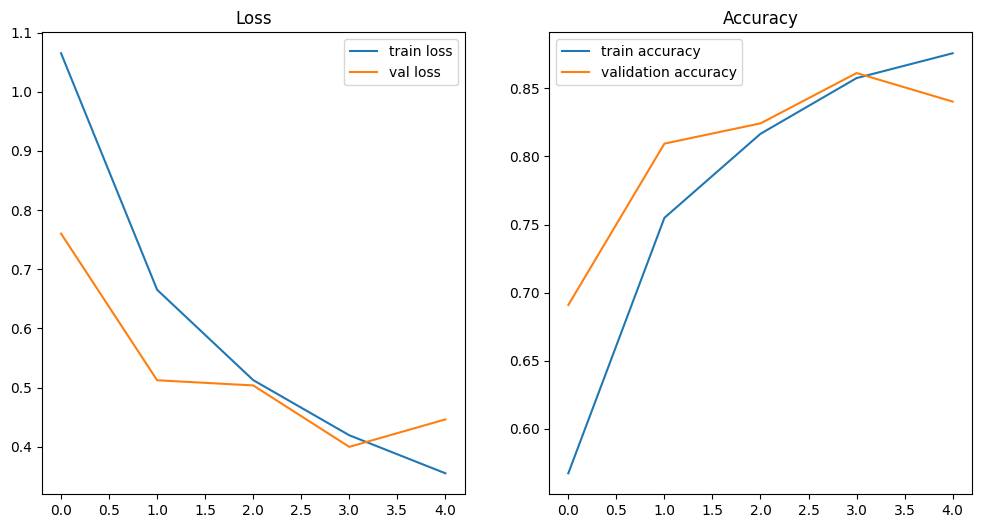

In [ ]:
# Plotting the training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 174ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.15.57.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 69.93970274925232
Percentage of Other Ethnicities:
asian: 6.27%
black: 2.65%
indian: 21.15%

1/1 [==============================] - 0s 17ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.09.46.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 52.18419432640076
Percentage of Other Ethnicities:
asian: 26.52%
black: 2.50%
indian: 18.80%

1/1 [==============================] - 0s 19ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.33.36.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 37.02586591243744
Percentage of Other Ethnicities:
asian: 6.51%
black: 31.68%
indian: 24.78%

1/1 [==============================] - 0s 21ms/step
Image: /content/test_dataset/specific_dataset/black/Sc

In [ ]:
import os
import random

# Define the directory containing images for each ethnicity
ethnicity_dirs = {
    'asian': '/content/test_dataset/specific_dataset/asian',
    'black': '/content/test_dataset/specific_dataset/black',
    'indian': '/content/test_dataset/specific_dataset/indian',
    'white': '/content/test_dataset/specific_dataset/white'
}

# Define the list of ethnicity labels
ethnicity_labels = ['asian', 'black', 'indian', 'white']


# Function to randomly select image paths from each category
def select_random_images(ethnicity_dirs, num_images_per_ethnicity=2):
    random_images = []
    for ethnicity, directory in ethnicity_dirs.items():
        image_files = os.listdir(directory)
        random.shuffle(image_files)
        selected_images = [os.path.join(directory, fname) for fname in image_files[:num_images_per_ethnicity]]
        random_images.extend(selected_images)
    return random_images

# Predict ethnicity for each randomly selected image
random_image_paths = select_random_images(ethnicity_dirs)
for image_path in random_image_paths:
    ethnicity, percentage, other_percentages = predict_ethnicity(model, image_path)
    print("Image:", image_path)
    print("Predicted Ethnicity:", ethnicity)
    print("Percentage of Predicted Ethnicity:", percentage)
    print("Percentage of Other Ethnicities:")
    for label, percent in other_percentages.items():
        print(f"{label}: {percent:.2f}%")
    print()

1/1 [==============================] - 0s 27ms/step
Image: /content/test_dataset/specific_dataset/asian/Charles Melton.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 84.05923247337341
Percentage of Other Ethnicities:
asian: 6.86%
black: 1.42%
indian: 7.66%

1/1 [==============================] - 0s 29ms/step
Image: /content/test_dataset/specific_dataset/asian/Screenshot 2024-04-17 at 14.11.47.png
Predicted Ethnicity: white
Percentage of Predicted Ethnicity: 73.77381920814514
Percentage of Other Ethnicities:
asian: 20.47%
black: 2.08%
indian: 3.68%

1/1 [==============================] - 0s 31ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 13.26.31.png
Predicted Ethnicity: black
Percentage of Predicted Ethnicity: 79.92544770240784
Percentage of Other Ethnicities:
asian: 2.61%
indian: 5.98%
white: 11.49%

1/1 [==============================] - 0s 36ms/step
Image: /content/test_dataset/specific_dataset/black/Screenshot 2024-04-17 at 